In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import jieba as jb
import re
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable

# Data Loading

In [ ]:
pop = pd.read_csv('data_popular_3.csv')
pop1 = pop.drop(["id", "forumAlias", "commentCount", "likeCount", "createdAt", "excerpt"], axis=1)
label = [1] * pop1.shape[0]
pop1['label'] = label
pop1

,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,好瞎==這算虐待動物吧,更4 B734 \n-\n更3\n雖然整件事讓人氣憤 但希望大家還是保持理性 就事論事 不要...,True,True,F,心情,['虐待動物'],1
1,男友說要禁欲了?哭啊！？,我的的男友，跟我一起破處後，還來不及享受愛愛帶來的快感，就被突然襲來的焦慮嚇到跟我說他要禁欲...,True,True,F,感情,"['男友', '哭']",1
2,H漫網頁被班上喜歡的男同學看到…..,在高三停課的前一週\n班上（坐在我前的男同學）突然有事要聯絡爸爸，但他匆忙出門沒帶手機\n\...,True,True,F,心情,"['心事', '女生', '靠北', '閒聊', '男生']",1
3,意外發現高中朋友當初過世是假的,現在的心情真的很複雜，就像當初聽到她過世的消息一樣突然，事情發生在兩年前，\n前一天晚上她打...,True,True,F,心情,"['朋友', '心事']",1
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,False,False,M,YouTuber,"['博恩', 'cheap', 'bump', '機車', '政府']",1
...,...,...,...,...,...,...,...,...
559,原來是鹹的,https://megapx-assets.dcard.tw/images/29fef7b3...,False,False,M,VTuber,"['VTuber', 'hololive', 'hololiveEN']",1
560,#分享 theqoo熱門 擅長綜藝的男女偶像TOP2,* 以原PO主觀標準來看的 *\n\n男偶像代表——EXO伯賢\n\n↓\nhttps://...,False,True,F,追星,"['追星', 'SHINee', 'SEVENTEEN', 'ohmygirl', '美珠']",1
561,-近期用餐心得20間濃縮版本(2022/06),一個月內的餐廳(喜歡的小吃)心得濃縮版。\n※業配風波請不要延燒到我這裡，文章內寫不好吃還問...,False,False,F,美食,"['食記', '台北美食']",1
562,10家必吃！網購甜點 不藏私大公開?,安安！我是77??\n第一次在美食版發文有點緊張><\n本身非常愛吃美食還有甜點\n今天來開...,False,False,F,美食,"['網購', '甜點', '食記', '美食', '吃貨']",1


In [ ]:
notp = pd.read_csv('data_notpopular_3.csv')
notp1 = notp.drop(["id", "forumAlias", "commentCount", "likeCount", "createdAt", "excerpt"], axis=1)
label = [0] * notp1.shape[0]
notp1['label'] = label
notp1

,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,無法接受朋友嫁給工人,我和閨蜜a家境都算不錯\n我們倆從小就讀知名國際學校\n朋友圈也都差不多\n大家也常常帶另一...,True,True,F,心情,[],0
1,看熱鬧的小孩撿角,如題，最近還多廟會活動，無意間聽到身邊的長輩說，看熱鬧的小孩這輩子真的撿角，我心裡想說，小朋...,False,True,F,閒聊,"['廟會', '閒聊', '台灣', '時事', '生活']",0
2,渣男,此篇文章為轉貼文章，請更新至最新版本觀看完整內容。,True,True,F,感情,"['渣男', '新竹', '感情', '交友軟體', '女孩']",0
3,男生都愛臭婊子,臭婊男生平常罵歸罵\n其實還是最喜歡這種的吧\n不然為什麼男友一邊說\n我是很乖很棒的女生\...,True,True,F,感情,[],0
4,#開箱 NARUKO茶樹抗痘粉刺寶-消腫痘救星?,NaN,False,False,F,美妝,"['開箱', '茶樹', '保養', '抗痘']",0
...,...,...,...,...,...,...,...,...
562,高醫醫學or北醫牙醫,小弟是南部人，今年有幸正取高醫醫學與北醫牙醫，懇請各路大神給點建議（這兩個選擇的利與弊），感...,False,False,M,考試,"['考試', '高醫', '北醫', '醫學', '學測']",0
563,富邦防疫險*隔離*理賠,因為同住家人確診 所以我們被匡列隔離3+4\n我們是保富邦的 請問有人已理賠隔離費用的嗎！需...,False,False,F,閒聊,"['富邦', '防疫險', '隔離', '閒聊', 'COVID19']",0
564,營業中 顏佑庭,只有我覺得他是被煞到嗎？\n好像六神無主一樣\n送個小碗就那麼兩桌，錢姐桌、棒球桌\n這樣都...,False,True,M,戲劇綜藝,"['營業中', '顏佑庭']",0
565,有人知道他是誰嗎？,很常出現在抖音裡的一群男模走秀！？\n只找到一些關鍵字?中模經紀?\n附上照片 從影片中擷取...,False,False,F,中國明星,"['中國明星', '抖音', '小紅書']",0


In [ ]:
df = pd.concat([pop1,notp1], ignore_index=True)
df

,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,好瞎==這算虐待動物吧,更4 B734 \n-\n更3\n雖然整件事讓人氣憤 但希望大家還是保持理性 就事論事 不要...,True,True,F,心情,['虐待動物'],1
1,男友說要禁欲了?哭啊！？,我的的男友，跟我一起破處後，還來不及享受愛愛帶來的快感，就被突然襲來的焦慮嚇到跟我說他要禁欲...,True,True,F,感情,"['男友', '哭']",1
2,H漫網頁被班上喜歡的男同學看到…..,在高三停課的前一週\n班上（坐在我前的男同學）突然有事要聯絡爸爸，但他匆忙出門沒帶手機\n\...,True,True,F,心情,"['心事', '女生', '靠北', '閒聊', '男生']",1
3,意外發現高中朋友當初過世是假的,現在的心情真的很複雜，就像當初聽到她過世的消息一樣突然，事情發生在兩年前，\n前一天晚上她打...,True,True,F,心情,"['朋友', '心事']",1
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,False,False,M,YouTuber,"['博恩', 'cheap', 'bump', '機車', '政府']",1
...,...,...,...,...,...,...,...,...
1126,高醫醫學or北醫牙醫,小弟是南部人，今年有幸正取高醫醫學與北醫牙醫，懇請各路大神給點建議（這兩個選擇的利與弊），感...,False,False,M,考試,"['考試', '高醫', '北醫', '醫學', '學測']",0
1127,富邦防疫險*隔離*理賠,因為同住家人確診 所以我們被匡列隔離3+4\n我們是保富邦的 請問有人已理賠隔離費用的嗎！需...,False,False,F,閒聊,"['富邦', '防疫險', '隔離', '閒聊', 'COVID19']",0
1128,營業中 顏佑庭,只有我覺得他是被煞到嗎？\n好像六神無主一樣\n送個小碗就那麼兩桌，錢姐桌、棒球桌\n這樣都...,False,True,M,戲劇綜藝,"['營業中', '顏佑庭']",0
1129,有人知道他是誰嗎？,很常出現在抖音裡的一群男模走秀！？\n只找到一些關鍵字?中模經紀?\n附上照片 從影片中擷取...,False,False,F,中國明星,"['中國明星', '抖音', '小紅書']",0


# Data Visualization

In [ ]:
#sns 加入中文字型
from matplotlib.font_manager import FontProperties

myfont= FontProperties(fname=r'/content/SimHei.ttf',size=14)

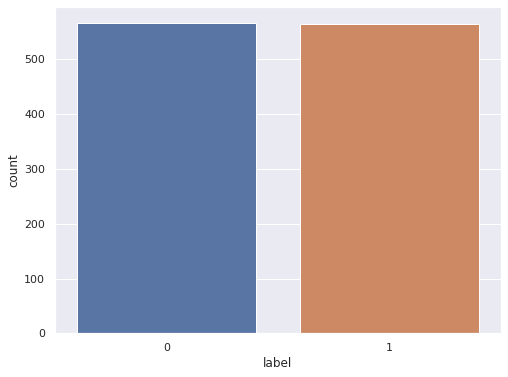

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.countplot(x="label", data=df)

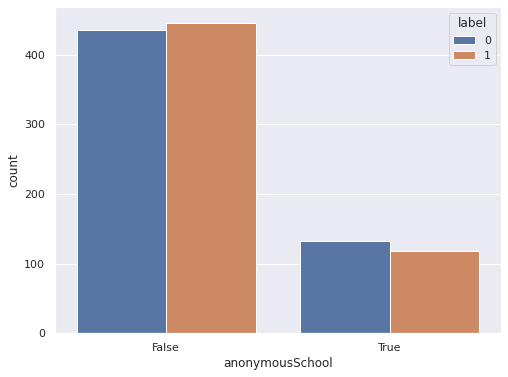

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.countplot(x="anonymousSchool", hue="label", data=df)

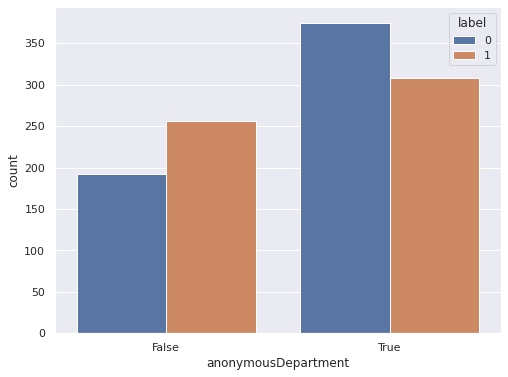

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.countplot(x="anonymousDepartment", hue="label", data=df)

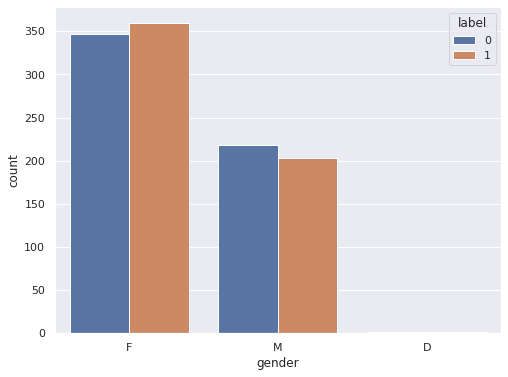

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.countplot(x="gender", hue="label", data=df)

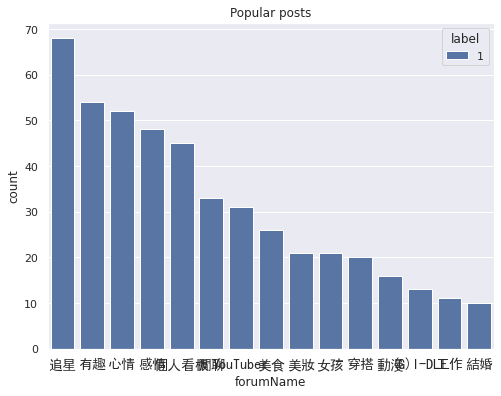

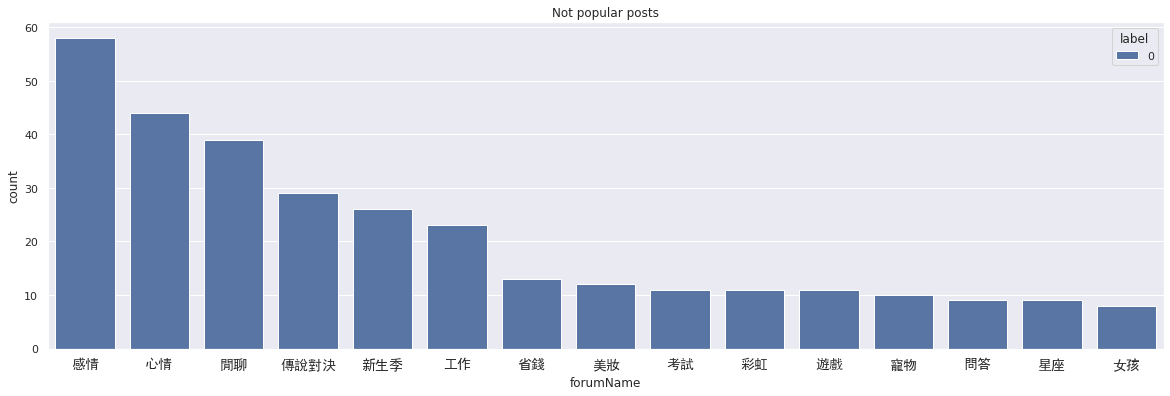

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font='SimHei')
plt.xticks(fontproperties=myfont)

sns.set(rc = {'figure.figsize':(20,6)})
plt.title('Popular posts')
sns.countplot(x="forumName", hue="label", data=pop1, order=pd.value_counts(pop1['forumName']).iloc[:15].index)


plt.figure()
plt.title('Not popular posts')
sns.set(rc = {'figure.figsize':(20,6)})
plt.xticks(fontproperties=myfont)
sns.countplot(x="forumName", hue="label", data=notp1, order=pd.value_counts(notp1['forumName']).iloc[:15].index)

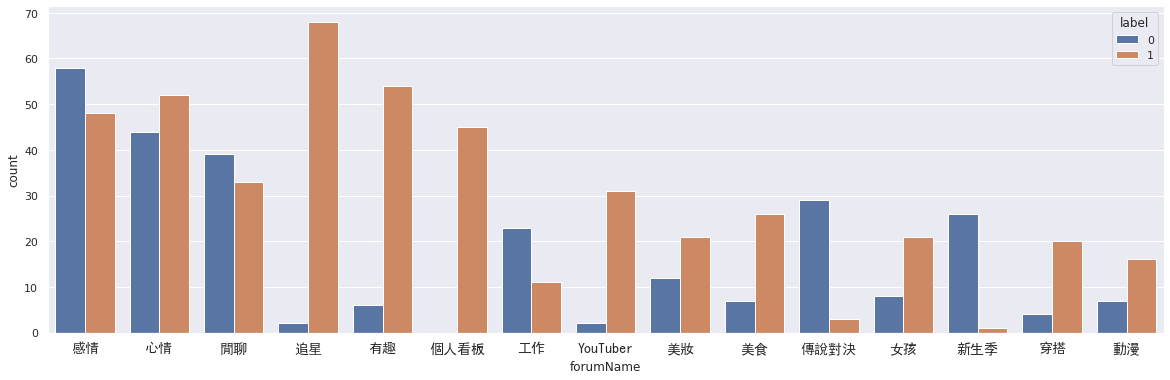

In [ ]:
sns.set(rc = {'figure.figsize':(20,6)})
plt.xticks(fontproperties=myfont)
sns.countplot(x="forumName", hue="label", data=df, order=pd.value_counts(df['forumName']).iloc[:15].index)

# Data Preprocessing

In [ ]:
#drop nan
print(df.isnull().sum())
df1=df.dropna()
df1

title                   0
content                54
anonymousSchool         0
anonymousDepartment     0
gender                  0
forumName               0
topics                  0
label                   0
dtype: int64


,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,好瞎==這算虐待動物吧,更4 B734 \n-\n更3\n雖然整件事讓人氣憤 但希望大家還是保持理性 就事論事 不要...,True,True,F,心情,['虐待動物'],1
1,男友說要禁欲了?哭啊！？,我的的男友，跟我一起破處後，還來不及享受愛愛帶來的快感，就被突然襲來的焦慮嚇到跟我說他要禁欲...,True,True,F,感情,"['男友', '哭']",1
2,H漫網頁被班上喜歡的男同學看到…..,在高三停課的前一週\n班上（坐在我前的男同學）突然有事要聯絡爸爸，但他匆忙出門沒帶手機\n\...,True,True,F,心情,"['心事', '女生', '靠北', '閒聊', '男生']",1
3,意外發現高中朋友當初過世是假的,現在的心情真的很複雜，就像當初聽到她過世的消息一樣突然，事情發生在兩年前，\n前一天晚上她打...,True,True,F,心情,"['朋友', '心事']",1
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,False,False,M,YouTuber,"['博恩', 'cheap', 'bump', '機車', '政府']",1
...,...,...,...,...,...,...,...,...
1126,高醫醫學or北醫牙醫,小弟是南部人，今年有幸正取高醫醫學與北醫牙醫，懇請各路大神給點建議（這兩個選擇的利與弊），感...,False,False,M,考試,"['考試', '高醫', '北醫', '醫學', '學測']",0
1127,富邦防疫險*隔離*理賠,因為同住家人確診 所以我們被匡列隔離3+4\n我們是保富邦的 請問有人已理賠隔離費用的嗎！需...,False,False,F,閒聊,"['富邦', '防疫險', '隔離', '閒聊', 'COVID19']",0
1128,營業中 顏佑庭,只有我覺得他是被煞到嗎？\n好像六神無主一樣\n送個小碗就那麼兩桌，錢姐桌、棒球桌\n這樣都...,False,True,M,戲劇綜藝,"['營業中', '顏佑庭']",0
1129,有人知道他是誰嗎？,很常出現在抖音裡的一群男模走秀！？\n只找到一些關鍵字?中模經紀?\n附上照片 從影片中擷取...,False,False,F,中國明星,"['中國明星', '抖音', '小紅書']",0


In [ ]:
# label encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in df1[['anonymousSchool','anonymousDepartment','gender', 'forumName']]:
  df1[col]=le.fit_transform(df1[col])
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,好瞎==這算虐待動物吧,更4 B734 \n-\n更3\n雖然整件事讓人氣憤 但希望大家還是保持理性 就事論事 不要...,1,1,1,42,['虐待動物'],1
1,男友說要禁欲了?哭啊！？,我的的男友，跟我一起破處後，還來不及享受愛愛帶來的快感，就被突然襲來的焦慮嚇到跟我說他要禁欲...,1,1,1,44,"['男友', '哭']",1
2,H漫網頁被班上喜歡的男同學看到…..,在高三停課的前一週\n班上（坐在我前的男同學）突然有事要聯絡爸爸，但他匆忙出門沒帶手機\n\...,1,1,1,42,"['心事', '女生', '靠北', '閒聊', '男生']",1
3,意外發現高中朋友當初過世是假的,現在的心情真的很複雜，就像當初聽到她過世的消息一樣突然，事情發生在兩年前，\n前一天晚上她打...,1,1,1,42,"['朋友', '心事']",1
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,0,0,2,17,"['博恩', 'cheap', 'bump', '機車', '政府']",1
...,...,...,...,...,...,...,...,...
1126,高醫醫學or北醫牙醫,小弟是南部人，今年有幸正取高醫醫學與北醫牙醫，懇請各路大神給點建議（這兩個選擇的利與弊），感...,0,0,2,98,"['考試', '高醫', '北醫', '醫學', '學測']",0
1127,富邦防疫險*隔離*理賠,因為同住家人確診 所以我們被匡列隔離3+4\n我們是保富邦的 請問有人已理賠隔離費用的嗎！需...,0,0,1,123,"['富邦', '防疫險', '隔離', '閒聊', 'COVID19']",0
1128,營業中 顏佑庭,只有我覺得他是被煞到嗎？\n好像六神無主一樣\n送個小碗就那麼兩桌，錢姐桌、棒球桌\n這樣都...,0,1,2,46,"['營業中', '顏佑庭']",0
1129,有人知道他是誰嗎？,很常出現在抖音裡的一群男模走秀！？\n只找到一些關鍵字?中模經紀?\n附上照片 從影片中擷取...,0,0,1,18,"['中國明星', '抖音', '小紅書']",0


## 清理文字

In [ ]:
#刪除字母、數字和中文以外的字
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

#刪除一些無意義的常用詞(stopword)
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  


stopwords = stopwordslist("stopword.txt")

In [ ]:
#刪除字母、數字和中文以外的字
for col in ['title','content', 'topics']:
  df1[col] = df1[col].apply(remove_punctuation)
for col in ['title','content', 'topics']:
  df1[col] = df1[col].apply(remove_punctuation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


清除網址、'B##'和'\n'

In [ ]:
def remove_url(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:-]*')
    line = rule.sub('',line)
    return line
    
def remove_other(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(r'\n|B[0-9-]*')
    line = rule.sub('',line)
    return line

In [ ]:
for col in ['title','content', 'topics']:
  df1[col] = df1[col].apply(remove_url)
  df1[col] = df1[col].apply(remove_other)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


分離字詞，並過濾無意義的常用詞(stopword)

In [ ]:
#分離字詞，並過濾無意義的常用詞(stopword)
for col in ['title','content', 'topics']:
  df1[col] = df1[col].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,瞎 這算 虐待 動物,4 3 整件事 人氣憤 希望 理性 事論 事 人身 攻擊 喔 2 有台 中 老 四川 店家 ...,1,1,1,42,虐待 動物,1
1,男友 禁欲 哭,男友 破處 還來 不及 享受 愛愛帶 快感 襲來 焦慮 嚇到 禁欲 三年 他會 幫 我記 月...,1,1,1,44,男友 哭,1
2,H 漫網 頁 班上 喜歡 男同學,高三 停課 前 一週 班上 坐在 我前 男同學 有事 爸爸 匆忙 出門 沒帶 手機 轉頭問 ...,1,1,1,42,心事 女生 靠北 閒聊 男生,1
3,意外 發現 高中 朋友 當初 過世是 假,心情 複 雜就 當初 聽 過世 消息 事情 發生 兩 年前 前一天 晚上 電話給 太晚 接到...,1,1,1,42,朋友 心事,1
4,本週 連續 3 位 網紅 政府 槓上,連續 3 位 網紅 政府 槓上 發 這篇文 youtube 上傳 影片 時間 排序 1STR...,0,0,2,17,博恩 cheapbump 機車 政府,1
...,...,...,...,...,...,...,...,...
1126,高醫 醫學 or 北醫牙醫,小弟 南部 有幸 正取 高醫 醫學 北醫牙 醫懇 請 各路 大神 給點 建議 這兩個 選擇 ...,0,0,2,98,考試 高 醫北醫 醫學學測,0
1127,富邦 防疫 險隔 離理 賠,同住 家人 確診 匡列 隔離 34 保富邦 請問 已理 賠隔 離費用 資料 時間 大概 多久 謝謝,0,0,1,123,富邦 防疫 險隔 離閒聊 COVID19,0
1128,營業 中 顏佑庭,我覺 煞 好像 六神 無主一樣 送個 小碗 兩桌 錢 姐桌 棒球 桌 送 錯桌 明明 指令 ...,0,1,2,46,營業 中 顏佑庭,0
1129,,很常 抖 音裡 一群 男模 走秀 只 找到 關鍵 字 中模 經紀 附上 照片 影片 中擷 取...,0,0,1,18,中國 明星 抖音 小紅書,0


## Word cloud

In [ ]:
from collections import Counter
from wordcloud import WordCloud
 
def generate_wordcloud(tup):
    wordcloud = WordCloud(background_color='white',
                          font_path='simhei.ttf',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wordcloud

In [ ]:
cat_dic = dict()
#title
for cat in [0,1]:   
    text = df1.loc[df1['label']==cat, 'title']
    text = (' '.join(map(str,text))).split(' ')
    cat_dic[cat]=text

#content
for cat in [0,1]:   
    text = df1.loc[df1['label']==cat, 'content']
    text = (' '.join(map(str,text))).split(' ')
    cat_dic[cat+2]=text

#topics
for cat in [0,1]:   
    text = df1.loc[df1['label']==cat, 'topics']
    text = (' '.join(map(str,text))).split(' ')
    cat_dic[cat+4]=text


max_pop=Counter(cat_dic[1]).most_common(100)
max_notpop=Counter(cat_dic[0]).most_common(100)

max_pop_con=Counter(cat_dic[3]).most_common(100)
max_notpop_con=Counter(cat_dic[2]).most_common(100)

max_pop_top=Counter(cat_dic[5]).most_common(100)
max_notpop_top=Counter(cat_dic[4]).most_common(100)

(-0.5, 399.5, 199.5, -0.5)

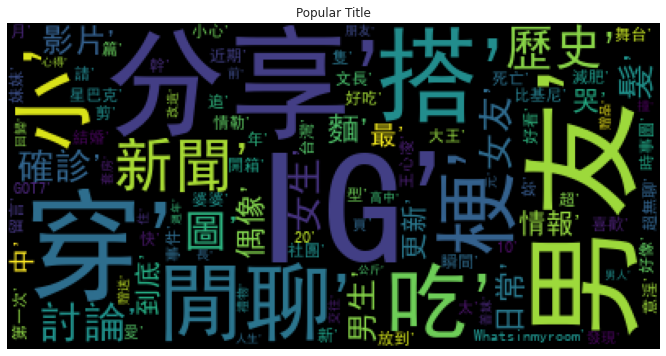

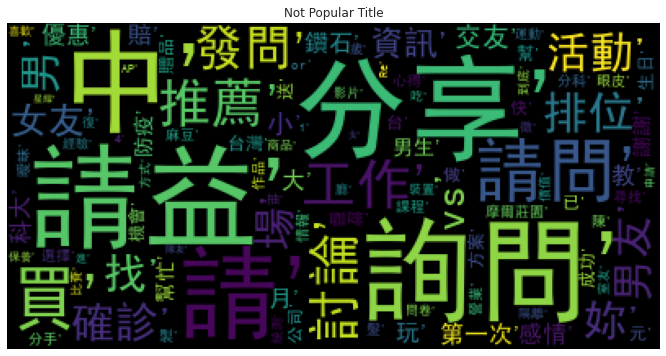

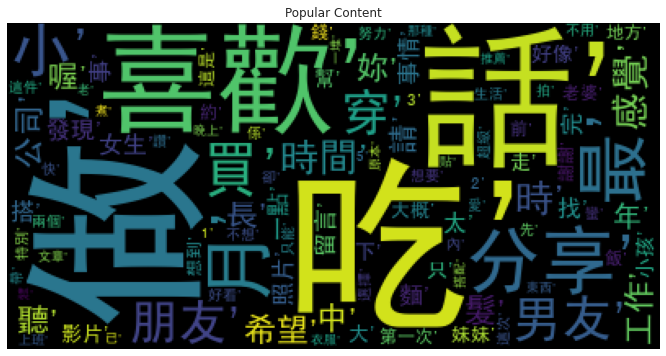

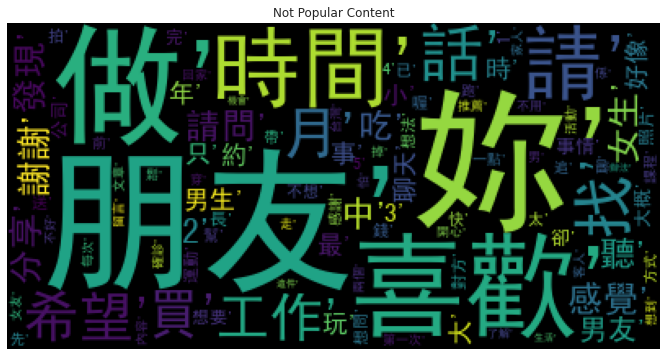

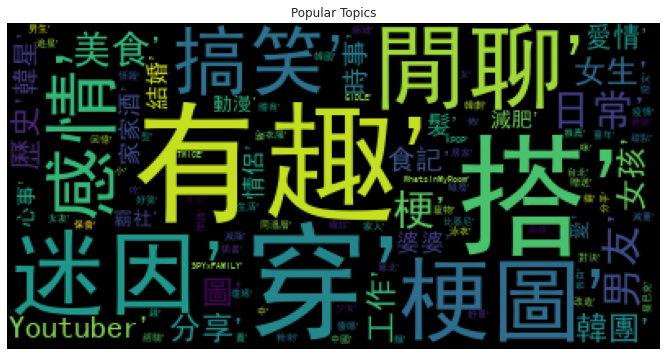

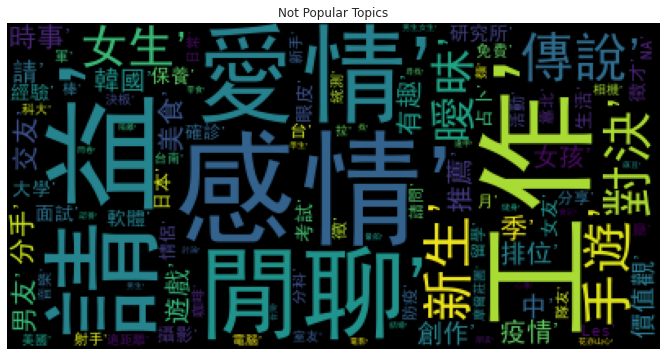

In [ ]:
cloud_pop = WordCloud(font_path='SimHei.ttf').generate(str(max_pop))
cloud_notpop = WordCloud(font_path='SimHei.ttf').generate(str(max_notpop))
cloud_pop_con = WordCloud(font_path='SimHei.ttf').generate(str(max_pop_con))
cloud_notpop_con = WordCloud(font_path='SimHei.ttf').generate(str(max_notpop_con))
cloud_pop_top = WordCloud(font_path='SimHei.ttf').generate(str(max_pop_top))
cloud_notpop_top = WordCloud(font_path='SimHei.ttf').generate(str(max_notpop_top))

plt.title('Popular Title')
plt.imshow(cloud_pop)
plt.axis('off')

plt.figure()
plt.title('Not Popular Title')
plt.imshow(cloud_notpop)
plt.axis('off')

plt.figure()
plt.title('Popular Content')
plt.imshow(cloud_pop_con)
plt.axis('off')

plt.figure()
plt.title('Not Popular Content')
plt.imshow(cloud_notpop_con)
plt.axis('off')

plt.figure()
plt.title('Popular Topics')
plt.imshow(cloud_pop_top)
plt.axis('off')

plt.figure()
plt.title('Not Popular Topics')
plt.imshow(cloud_notpop_top)
plt.axis('off')

In [ ]:
df1['content'] = df1['title']+ ' '+ df1['content'] + ' ' + df1['topics']
df1 = df1.drop(["title", "topics"], axis=1)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,content,anonymousSchool,anonymousDepartment,gender,forumName,label
0,瞎 這算 虐待 動物 4 3 整件事 人氣憤 希望 理性 事論 事 人身 攻擊 喔 2 有台...,1,1,1,42,1
1,男友 禁欲 哭 男友 破處 還來 不及 享受 愛愛帶 快感 襲來 焦慮 嚇到 禁欲 三年 他...,1,1,1,44,1
2,H 漫網 頁 班上 喜歡 男同學 高三 停課 前 一週 班上 坐在 我前 男同學 有事 爸爸...,1,1,1,42,1
3,意外 發現 高中 朋友 當初 過世是 假 心情 複 雜就 當初 聽 過世 消息 事情 發生 ...,1,1,1,42,1
4,本週 連續 3 位 網紅 政府 槓上 連續 3 位 網紅 政府 槓上 發 這篇文 youtu...,0,0,2,17,1
...,...,...,...,...,...,...
1126,高醫 醫學 or 北醫牙醫 小弟 南部 有幸 正取 高醫 醫學 北醫牙 醫懇 請 各路 大神...,0,0,2,98,0
1127,富邦 防疫 險隔 離理 賠 同住 家人 確診 匡列 隔離 34 保富邦 請問 已理 賠隔 離...,0,0,1,123,0
1128,營業 中 顏佑庭 我覺 煞 好像 六神 無主一樣 送個 小碗 兩桌 錢 姐桌 棒球 桌 送 ...,0,1,2,46,0
1129,很常 抖 音裡 一群 男模 走秀 只 找到 關鍵 字 中模 經紀 附上 照片 影片 中擷 ...,0,0,1,18,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#shuffle data
from sklearn.utils import shuffle

df1=shuffle(df1)

In [ ]:
# train:test = (all-100):100
train = df1[100:]
test = df1[0:100]
all_data = df1
train

,content,anonymousSchool,anonymousDepartment,gender,forumName,label
881,分享 保養 Simplism 簡單 保養 舒緩 噴霧 httpsiimgurcomcz3Ed...,0,0,1,94,0
1081,開箱 新 入手 防曬 乳 身為 一位 女性 保養 太 懂 極度 懶動手 保養 加上 剛好 朋...,0,1,1,35,0
397,ya 結婚 兩 週年 快樂 dcard 分享 故事 這幾年 忘記 原本 註 冊 信箱 遲遲 ...,0,1,1,44,1
613,男生 男友 女生 穩聊 好奇 男生 會不會 個性 很合 男友 女生 穩聊 日常生活 瑣事 朋...,1,1,1,44,0
1030,努力 善良 蒸 上課 斜 前方 女生 噴爆 寶雅 那種 味道 香水 除臭 劑 教室 前方 冷...,1,1,1,42,0
...,...,...,...,...,...,...
682,0524 免費手 機遊戲 下載 排行榜 AppStore 免費 遊戲 TOP101Apex ...,0,0,0,48,0
1129,很常 抖 音裡 一群 男模 走秀 只 找到 關鍵 字 中模 經紀 附上 照片 影片 中擷 ...,0,0,1,18,0
975,判斷 對方 對方 相處 一年 同學的關 係 下課 讀書 對方 女生 互動 開心 心情 不好 ...,1,1,2,44,0
1042,問捷 運上 公園 中 不停 規律 拍打 大腿 謎 活動 捷運上 一位 中年 大媽 等車 不停...,0,1,2,32,0


In [ ]:
# TF-IDF
count_vect = CountVectorizer()
train_x = count_vect.fit_transform(train['content'])
test_x = count_vect.transform(test['content'])

tfidf_transformer = TfidfTransformer()
train_x = tfidf_transformer.fit_transform(train_x)
test_x = tfidf_transformer.transform(test_x)



In [ ]:
train_y=train['label'].to_numpy()
test_y=test['label'].to_numpy()
test_y.shape

#all
all_y=df1['label'].to_numpy()

# Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

nb=MultinomialNB()
lr=LogisticRegression(random_state=0)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from prettytable import PrettyTable
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
#Multinomial Naive Bayes
from sklearn.model_selection import KFold

acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  nb.fit(x_train, y_train)
  nb_predict=nb.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,nb_predict)
  
print(acc/3.0)

0.7368947616800378


In [ ]:
#Logistic Regression

acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  lr.fit(x_train, y_train)
  lr_predict=lr.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,lr_predict)

print(acc/3.0)

0.7533333333333333


In [ ]:
#KNN
knn1 = KNeighborsClassifier(10)
acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  knn1.fit(x_train, y_train)
  knn_predict=knn1.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,knn_predict)
  
knn_predict=knn1.predict(test_x)
acc_knn1=accuracy_score(test_y,knn_predict)
print(acc_knn1)

0.76


In [ ]:
#KNN
knn2 = KNeighborsClassifier(20)
acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  knn2.fit(x_train, y_train)
  knn_predict=knn2.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,knn_predict)
  
knn_predict=knn2.predict(test_x)
acc_knn2=accuracy_score(test_y,knn_predict)
print(acc_knn2)

0.73


In [ ]:
#KNN
knn3 = KNeighborsClassifier(30)
acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  knn3.fit(x_train, y_train)
  knn_predict=knn3.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,knn_predict)
  
knn_predict=knn3.predict(test_x)
acc_knn3=accuracy_score(test_y,knn_predict)
print(acc_knn3)

0.71


KNN Test Result Compare

In [ ]:
#Accuracy
print("Accuracy")
table=PrettyTable(['Method', 'Accuracy'])
table.add_row(['KNN(10)', acc_knn1])
table.add_row(['KNN(20)', acc_knn2])
table.add_row(['KNN(30)', acc_knn3])
print(table)

Accuracy
+---------+----------+
|  Method | Accuracy |
+---------+----------+
| KNN(10) |   0.76   |
| KNN(20) |   0.73   |
| KNN(30) |   0.71   |
+---------+----------+


In [ ]:
#testing

#Multinomial Naive Bayes
nb_predict=nb.predict(test_x)
acc_nb=accuracy_score(test_y,nb_predict)
result_nb=precision_recall_fscore_support(test_y,nb_predict,average=None)
cm_nb=confusion_matrix(test_y,nb_predict)
aucroc_nb=roc_auc_score(test_y,nb_predict, average=None)

#Logistic Regression
lr_predict=lr.predict(test_x)
acc_lr=accuracy_score(test_y,lr_predict)
result_lr=precision_recall_fscore_support(test_y,lr_predict,average=None)
cm_lr=confusion_matrix(test_y,lr_predict)
aucroc_lr=roc_auc_score(test_y,lr_predict, average=None)

#KNN
knn_predict=knn1.predict(test_x)
acc_knn=accuracy_score(test_y,knn_predict)
result_knn=precision_recall_fscore_support(test_y,knn_predict,average=None)
cm_knn=confusion_matrix(test_y,knn_predict)
aucroc_knn=roc_auc_score(test_y,knn_predict, average=None)


#Accuracy
print("Accuracy")
table=PrettyTable(['Method', 'Accuracy'])
table.add_row(['Multinomial NB', acc_nb])
table.add_row(['Logistic Regression', acc_lr])
table.add_row(['KNN', acc_knn])
print(table)

#Precision
print("\nPrecision")
table=PrettyTable(['Method', 'not popular','popular'])
table.add_row(['Multinomial NB']+result_nb[0].ravel().tolist())
table.add_row(['Logistic Regression']+result_lr[0].ravel().tolist())
table.add_row(['KNN']+result_knn[0].ravel().tolist())
print(table)

#F1 score
print("\nF1 score")
table=PrettyTable(['Method', 'not popular','popular'])
table.add_row(['Multinomial NB']+result_nb[2].ravel().tolist())
table.add_row(['Logistic Regression']+result_lr[2].ravel().tolist())
table.add_row(['KNN']+result_knn[2].ravel().tolist())
print(table)
 
#ROC AUC score
print("\nROC AUC score")
table=PrettyTable(['Method', 'ROC AUC score'])
table.add_row(['Multinomial NB',aucroc_nb])
table.add_row(['Logistic Regression',aucroc_lr])
table.add_row(['KNN',aucroc_knn])
print(table)

Accuracy
+---------------------+----------+
|        Method       | Accuracy |
+---------------------+----------+
|    Multinomial NB   |   0.71   |
| Logistic Regression |   0.76   |
|         KNN         |   0.76   |
+---------------------+----------+

Precision
+---------------------+--------------------+--------------------+
|        Method       |    not popular     |      popular       |
+---------------------+--------------------+--------------------+
|    Multinomial NB   | 0.9166666666666666 | 0.6447368421052632 |
| Logistic Regression | 0.7659574468085106 | 0.7547169811320755 |
|         KNN         | 0.7906976744186046 | 0.7368421052631579 |
+---------------------+--------------------+--------------------+

F1 score
+---------------------+--------------------+--------------------+
|        Method       |    not popular     |      popular       |
+---------------------+--------------------+--------------------+
|    Multinomial NB   | 0.6027397260273972 | 0.7716535433070866 |

In [ ]:
def plot_roc_curve(fper, tper, title):
    plt.figure(figsize=(6,6))
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    
    plt.legend()
    plt.show()

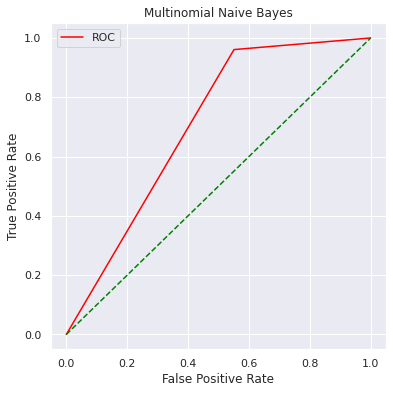

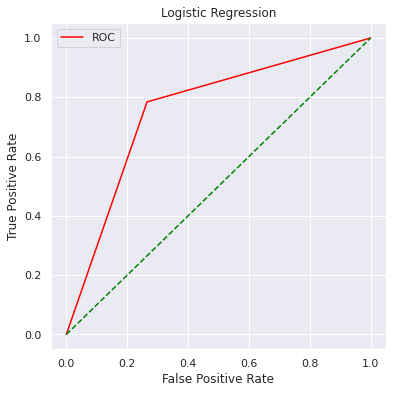

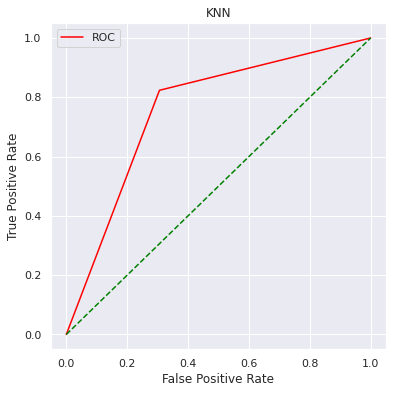

In [ ]:
# ROC curve

#Multinomial Naive Bayes
nb_fper, nb_tper, thresholds = roc_curve(test_y, nb_predict)
plot_roc_curve(nb_fper, nb_tper, "Multinomial Naive Bayes")

#Logistic Regression
lr_fper, lr_tper, thresholds = roc_curve(test_y, lr_predict)
plot_roc_curve(lr_fper, lr_tper, "Logistic Regression")

#KNN
knn_fper, knn_tper, thresholds = roc_curve(test_y, knn_predict)
plot_roc_curve(knn_fper, knn_tper, "KNN")


Text(48.5, 0.5, 'true value')

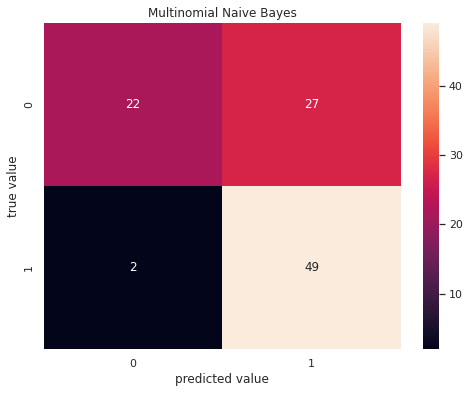

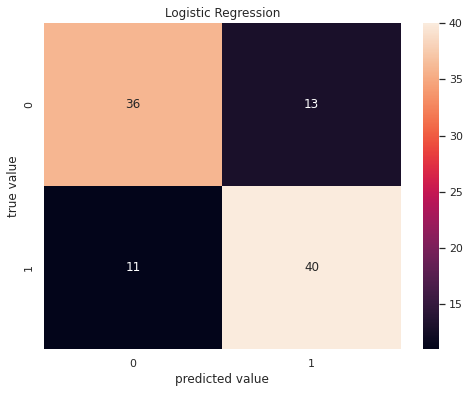

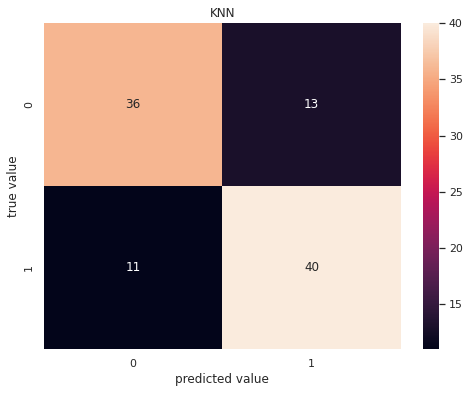

In [ ]:
#Confusion Matrix

#Multinomial Naive Bayes
plt.figure(figsize=(8,6))
plt.title("Multinomial Naive Bayes")
sns.heatmap(cm_nb, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#Logistic Regression
plt.figure(figsize=(8,6))
plt.title("Logistic Regression")
sns.heatmap(cm_lr, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#KNN
plt.figure(figsize=(8,6))
plt.title("KNN")
sns.heatmap(cm_lr, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")


結合文字跟categorical feature

In [ ]:
from scipy.sparse import coo_matrix,hstack
from sklearn import preprocessing

In [ ]:
lb_anonymousSchool = preprocessing.LabelBinarizer(sparse_output=True)
anonymousSchool = lb_anonymousSchool.fit_transform(all_data['anonymousSchool'])

lb_anonymousDepartment = preprocessing.LabelBinarizer(sparse_output=True)
anonymousDepartment = lb_anonymousDepartment.fit_transform(all_data['anonymousDepartment'])

lb_gender = preprocessing.LabelBinarizer(sparse_output=True)
gender = lb_gender.fit_transform(all_data['gender'])

lb_forumName = preprocessing.LabelBinarizer(sparse_output=True)
forumName = lb_forumName.fit_transform(all_data['forumName'])


In [ ]:
tfidf_content = CountVectorizer()
content = tfidf_content.fit_transform(all_data['content'])

tfidf_transformer = TfidfTransformer()
content = tfidf_transformer.fit_transform(content)

In [ ]:
all_x = hstack((anonymousSchool, anonymousDepartment, gender, forumName, content)).tocsr() #0.68


#train/test
train_x = all_x[100:]
test_x = all_x[0:100]


In [ ]:
nb=MultinomialNB()
lr=LogisticRegression(random_state=0)


In [ ]:
#Multinomial Naive Bayes
from sklearn.model_selection import KFold

acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  nb.fit(x_train, y_train)
  nb_predict=nb.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,nb_predict)
  

print(acc/3.0)

0.7686896334749096


In [ ]:
#Logistic Regression

acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  lr.fit(x_train, y_train)
  lr_predict=lr.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,lr_predict)
  

print(acc/3.0)

0.7717413874469089


In [ ]:
#KNN
knn4 = KNeighborsClassifier(10) #test: 10, 0.74
acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  knn4.fit(x_train, y_train)
  knn_predict=knn4.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,knn_predict)
  
knn_predict=knn4.predict(test_x)
acc_knn4=accuracy_score(test_y,knn_predict)
print(acc_knn4)

0.79


In [ ]:
#KNN
knn5 = KNeighborsClassifier(20) #test: 10, 0.74
acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  knn5.fit(x_train, y_train)
  knn_predict=knn5.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,knn_predict)
  
knn_predict=knn5.predict(test_x)
acc_knn5=accuracy_score(test_y,knn_predict)
print(acc_knn5)

0.76


In [ ]:
#KNN
knn6 = KNeighborsClassifier(30) #test: 10, 0.74
acc=0      #accuracy


kf = KFold(n_splits=3)
for t, v in kf.split(train_x):

  x_train=train_x[t,:]
  y_train=train_y[t]
  x_val=train_x[v,:]
  y_val=train_y[v]

  knn6.fit(x_train, y_train)
  knn_predict=knn6.predict(x_val)      #取得預測結果
  acc+=accuracy_score(y_val,knn_predict)
  
knn_predict=knn6.predict(test_x)
acc_knn6=accuracy_score(test_y,knn_predict)
print(acc_knn6)

0.71


KNN Test Result Compare

In [ ]:
#Accuracy
print("Accuracy")
table=PrettyTable(['Method', 'Accuracy'])
table.add_row(['KNN(10)', acc_knn4])
table.add_row(['KNN(20)', acc_knn5])
table.add_row(['KNN(30)', acc_knn6])
print(table)

Accuracy
+---------+----------+
|  Method | Accuracy |
+---------+----------+
| KNN(10) |   0.79   |
| KNN(20) |   0.76   |
| KNN(30) |   0.71   |
+---------+----------+


Test result

In [ ]:
#testing

#Multinomial Naive Bayes
nb_predict=nb.predict(test_x)
acc_nb=accuracy_score(test_y,nb_predict)
result_nb=precision_recall_fscore_support(test_y,nb_predict,average=None)
cm_nb=confusion_matrix(test_y,nb_predict)
aucroc_nb=roc_auc_score(test_y,nb_predict, average=None)

#Logistic Regression
lr_predict=lr.predict(test_x)
acc_lr=accuracy_score(test_y,lr_predict)
result_lr=precision_recall_fscore_support(test_y,lr_predict,average=None)
cm_lr=confusion_matrix(test_y,lr_predict)
aucroc_lr=roc_auc_score(test_y,lr_predict, average=None)

#KNN
knn_predict=knn4.predict(test_x)
acc_knn=accuracy_score(test_y,knn_predict)
result_knn=precision_recall_fscore_support(test_y,knn_predict,average=None)
cm_knn=confusion_matrix(test_y,knn_predict)
aucroc_knn=roc_auc_score(test_y,knn_predict, average=None)


#Accuracy
print("Accuracy")
table=PrettyTable(['Method', 'Accuracy'])
table.add_row(['Multinomial NB', acc_nb])
table.add_row(['Logistic Regression', acc_lr])
table.add_row(['KNN', acc_knn])
print(table)

#Precision
print("\nPrecision")
table=PrettyTable(['Method', 'not popular','popular'])
table.add_row(['Multinomial NB']+result_nb[0].ravel().tolist())
table.add_row(['Logistic Regression']+result_lr[0].ravel().tolist())
table.add_row(['KNN']+result_knn[0].ravel().tolist())
print(table)

#F1 score
print("\nF1 score")
table=PrettyTable(['Method', 'not popular','popular'])
table.add_row(['Multinomial NB']+result_nb[2].ravel().tolist())
table.add_row(['Logistic Regression']+result_lr[2].ravel().tolist())
table.add_row(['KNN']+result_knn[2].ravel().tolist())
print(table)

#ROC AUC score
print("\nROC AUC score")
table=PrettyTable(['Method', 'ROC AUC score'])
table.add_row(['Multinomial NB',aucroc_nb])
table.add_row(['Logistic Regression',aucroc_lr])
table.add_row(['KNN',aucroc_knn])
print(table)

Accuracy
+---------------------+----------+
|        Method       | Accuracy |
+---------------------+----------+
|    Multinomial NB   |   0.85   |
| Logistic Regression |   0.85   |
|         KNN         |   0.79   |
+---------------------+----------+

Precision
+---------------------+--------------------+--------------------+
|        Method       |    not popular     |      popular       |
+---------------------+--------------------+--------------------+
|    Multinomial NB   | 0.8813559322033898 | 0.8048780487804879 |
| Logistic Regression | 0.8813559322033898 | 0.8048780487804879 |
|         KNN         | 0.8679245283018868 | 0.7021276595744681 |
+---------------------+--------------------+--------------------+

F1 score
+---------------------+--------------------+--------------------+
|        Method       |    not popular     |      popular       |
+---------------------+--------------------+--------------------+
|    Multinomial NB   | 0.8739495798319329 | 0.8148148148148149 |

In [ ]:
def plot_roc_curve(fper, tper, title):
    plt.figure(figsize=(6,6))
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    
    plt.legend()
    plt.show()

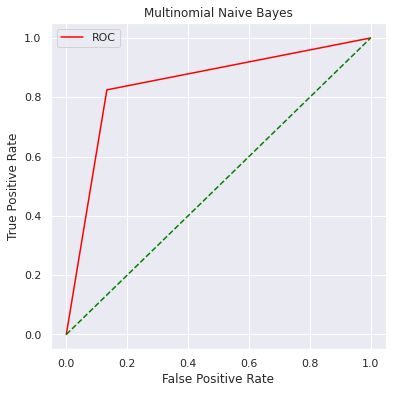

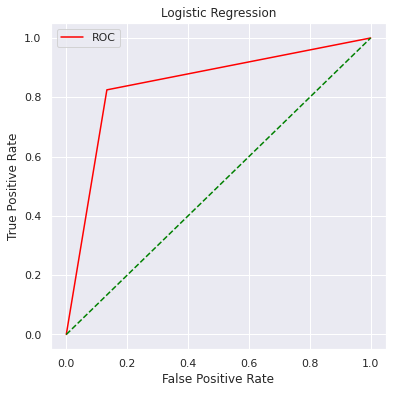

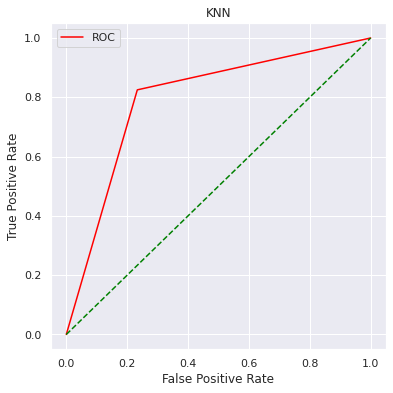

In [ ]:
# ROC curve

#Multinomial Naive Bayes
nb_fper, nb_tper, thresholds = roc_curve(test_y, nb_predict)
plot_roc_curve(nb_fper, nb_tper, "Multinomial Naive Bayes")

#Logistic Regression
lr_fper, lr_tper, thresholds = roc_curve(test_y, lr_predict)
plot_roc_curve(lr_fper, lr_tper, "Logistic Regression")

#KNN
knn_fper, knn_tper, thresholds = roc_curve(test_y, knn_predict)
plot_roc_curve(knn_fper, knn_tper, "KNN")


Text(48.5, 0.5, 'true value')

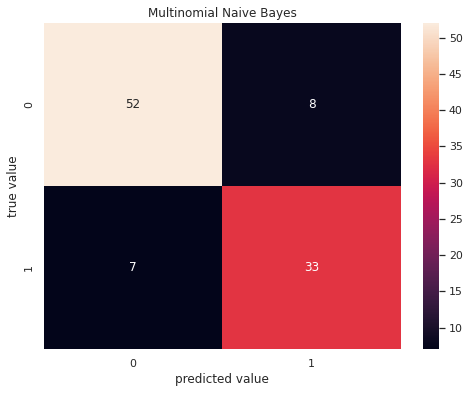

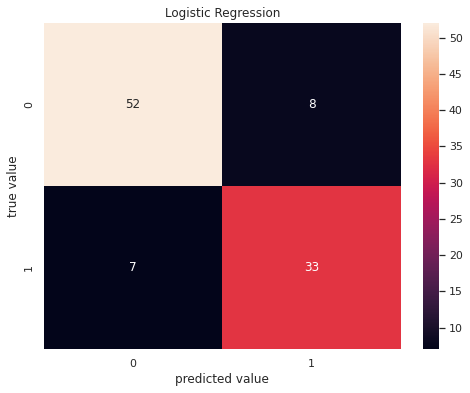

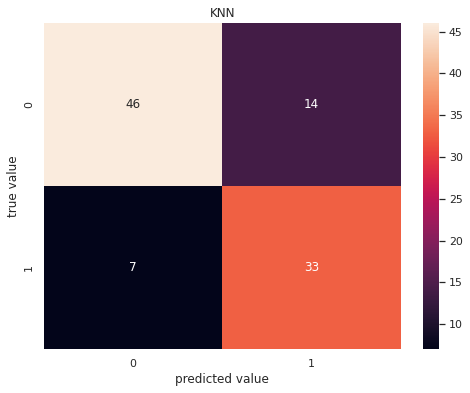

In [ ]:
#Confusion Matrix

#Multinomial Naive Bayes
plt.figure(figsize=(8,6))
plt.title("Multinomial Naive Bayes")
sns.heatmap(cm_nb, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#Logistic Regression
plt.figure(figsize=(8,6))
plt.title("Logistic Regression")
sns.heatmap(cm_lr, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#KNN
plt.figure(figsize=(8,6))
plt.title("KNN")
sns.heatmap(cm_knn, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")
